In [2]:
import pandas as pd

# Read n rows from the embedded data
df = pd.read_csv('../data/vec_avg_token_data.csv',nrows=1000, skiprows = 1)
label_vectors = pd.read_csv('../data/synonym_label_token_embeddings.csv')

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [3]:
import numpy as np
from sklearn.manifold import TSNE

# Use T-sne to get the data from 128 to 2 dimensions
data = np.append(X, label_vectors, axis=0)
data_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data)
X_embedded = data_embedded[:-4,:]
labels_embedded = data_embedded[-4:,:]

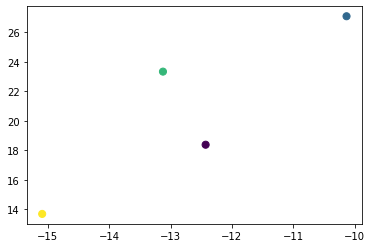

In [61]:
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels_embedded))), s = 50)


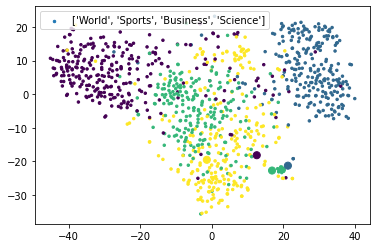

In [4]:
import matplotlib.pyplot as plt
labels = ["World","Sports","Business","Science"]

# Plot 2 dimensional data
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = y, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50)
plt.legend();

In [5]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics import confusion_matrix as cf, accuracy_score as acc_score

pred = np.argmax(cs(X, label_vectors), axis = 1)
#print(cf(y, pred))
print(acc_score(y,pred))

0.59


In [6]:
import itertools
from sklearn.cluster import KMeans

def all_combos(a,b):
    res = []

    permutations = itertools.permutations(a, len(b))
    for permutation in permutations:
        zipped = zip(permutation, b)
        res.append(list(zipped))
    
    return res

def get_mse_combo(a,b):
    max_mse = 0
    max_mse_index = 0
    i = 0
    p = []

    combos = all_combos(a,b)
    for combo in combos:
        mse = 0
        for pair in combo:
            pair = np.array(pair)
            #mse += cs([pair[0]],[pair[1]])
            mse += np.linalg.norm(pair[0]-pair[1])
        if mse < max_mse or not max_mse:
            max_mse = mse
            max_mse_index = i
            res = combo
        i += 1

    return res

def get_mse_index(a,b):
    pairs = get_mse_combo(a,b)
    res = []
    for pair in pairs:
        first = a.index(pair[0])
        second = b.index(pair[1])
        res.append((first,second))
    return res

def kmeans_pred(X, y, label_vectors, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters, init = label_vectors).fit(X)

    if not (type(label_vectors) is np.ndarray):
        label_vectors = label_vectors.to_numpy()
    indexes = get_mse_index(kmeans.cluster_centers_.tolist(), label_vectors.tolist())

    reps = dict(indexes)
    kmeans_pred = [reps.get(x,x) for x in kmeans.labels_]
    print(acc_score(y,kmeans_pred))
    return kmeans_pred

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca_data = pca.fit_transform(np.append(X, label_vectors, axis=0))
X_pca = pca_data[:-4,:]
labels_pca = pca_data[-4:,:]

print("Accuracy with kmeans clustering")
kmeans_pred(X,y, label_vectors, len(labels_embedded));

print("Accuracy with kmeans clustering using PCA")
kmeans_pred(X_pca,y, labels_pca, len(labels_embedded));


Accuracy with kmeans clustering
0.809
Accuracy with kmeans clustering using PCA
0.813


C:\Users\adamv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\adamv\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


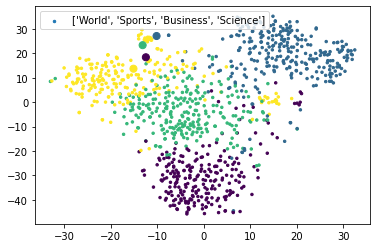

In [66]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = kmeans.labels_, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 50)
plt.legend();
